#Data 311 Final Project - Women in Headlines
Kate Campbell, Takira Boltman, Maddie Knappenberger


# Topic and About the Dataset


For our final project, we decided to work with a dataset that contains headlines from top news sources (2010-2020) from 4 countries (USA, India, UK, and South Africa) - all centered around women. We wanted to look at bias, gendered language, and common themes among them and train a model to be able to predict themes.
<br><br>
**Data Source We Found:** https://www.kaggle.com/datasets/thedevastator/women-in-headlines-bias 
<br>
**Original Source:** https://data.world/amberthomas
<br><br>
Here is a snippet of the dataset pre-cleanup: 
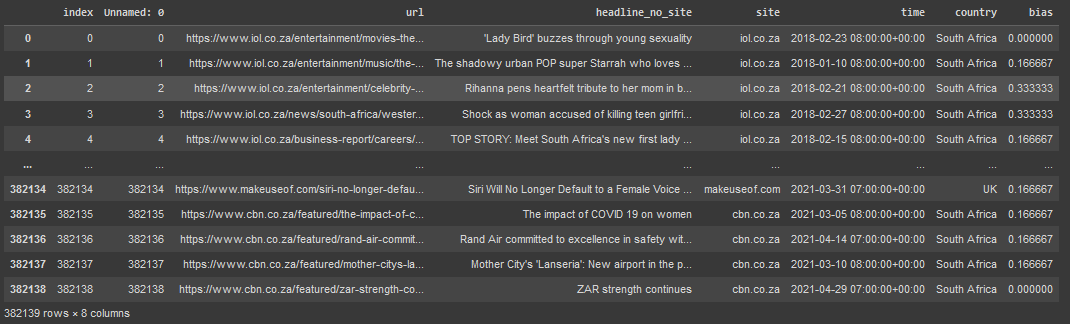

Included in this dataset by the original authors is a **Bias Score** column. It was measured using Gender Bias Taxonomy 1.0. A further explanation on this topic and how it was measured can be found here: https://aclanthology.org/W19-3802.pdf.

# Part 1: Cleanup and Exploratory Analysis

This process can be seen in the notebook: [Relationship Exploration](https://colab.research.google.com/drive/18zb9AjTU6CjIVHW7_S9qT7qocuz0uRTS?usp=sharing)

After downloading the dataset, we realized that it was 382139 rows long and would need to be trimmed down significantly to be able to use without long processing times of 20 minutes or more. The data was cleaned up: filtered by the columns we wanted (only the website, headline, time of post, country of origin, and bias score), and all the NaN rows were dropped. Here is a snippet of the data after the initial cleanup: 
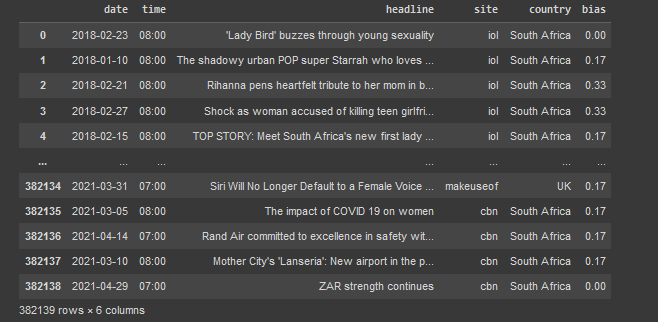

We then added a new column that used Vader (a Python tool used to gauge the emotion of sentiment from text) to perform Sentiment Analysis and add a column of polarity scores to all the headlines so that could be analyzed. These polarity scores measure the sentiment of a sentence, ranging from -4 to +4. On this scale, -4 is overwhlemingly negative, +4 is overwhelmingly positive, and 0 is neutral. It is sensitive to both the polarity and intensity of a sentence. 
<br><br>
Here is the dataset with the polarity score column added: 

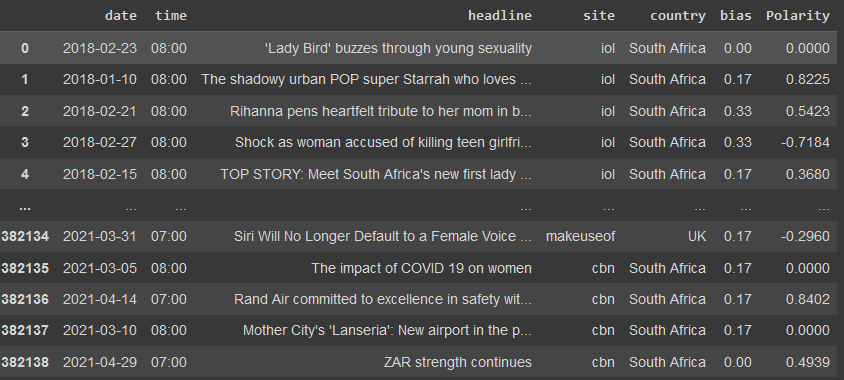

As you can see, the sentences with negative news have a negative polarity score, positive news has a score of at least .17, and neutral news has a score of 0. This way, we were able to analyze how positive or negative all of the headlines were with an easy way to plot them.

With the polarity scores added, we decided to plot the polarity scores for each of the 4 countries, as the set of data was still too large and we wanted to see if there were any that we could drop.

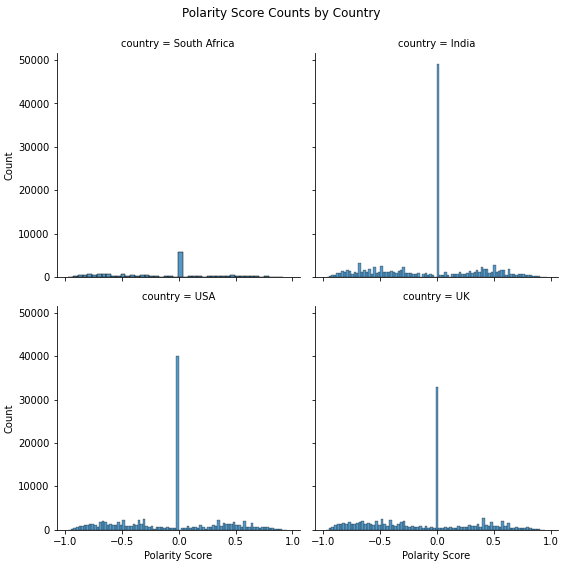

There is significantly less data for South Africa, so that can be dropped to make the dataframe smaller. Of the remaining 3, we decided to focus on the USA and India, as we figured we could gather interesting insights from this comparison. The culture of both countries is different enough that their news sources might be different, as well as their tones in their headlines to different events. 
<br><br>
We looked at the top news sites for each country, the top 10 for each, and only kept those to dwindle down the data sets even more. 

We started the analysis by comparing the average polarity and bias scores between the USA and Inda by website. Here is India's:
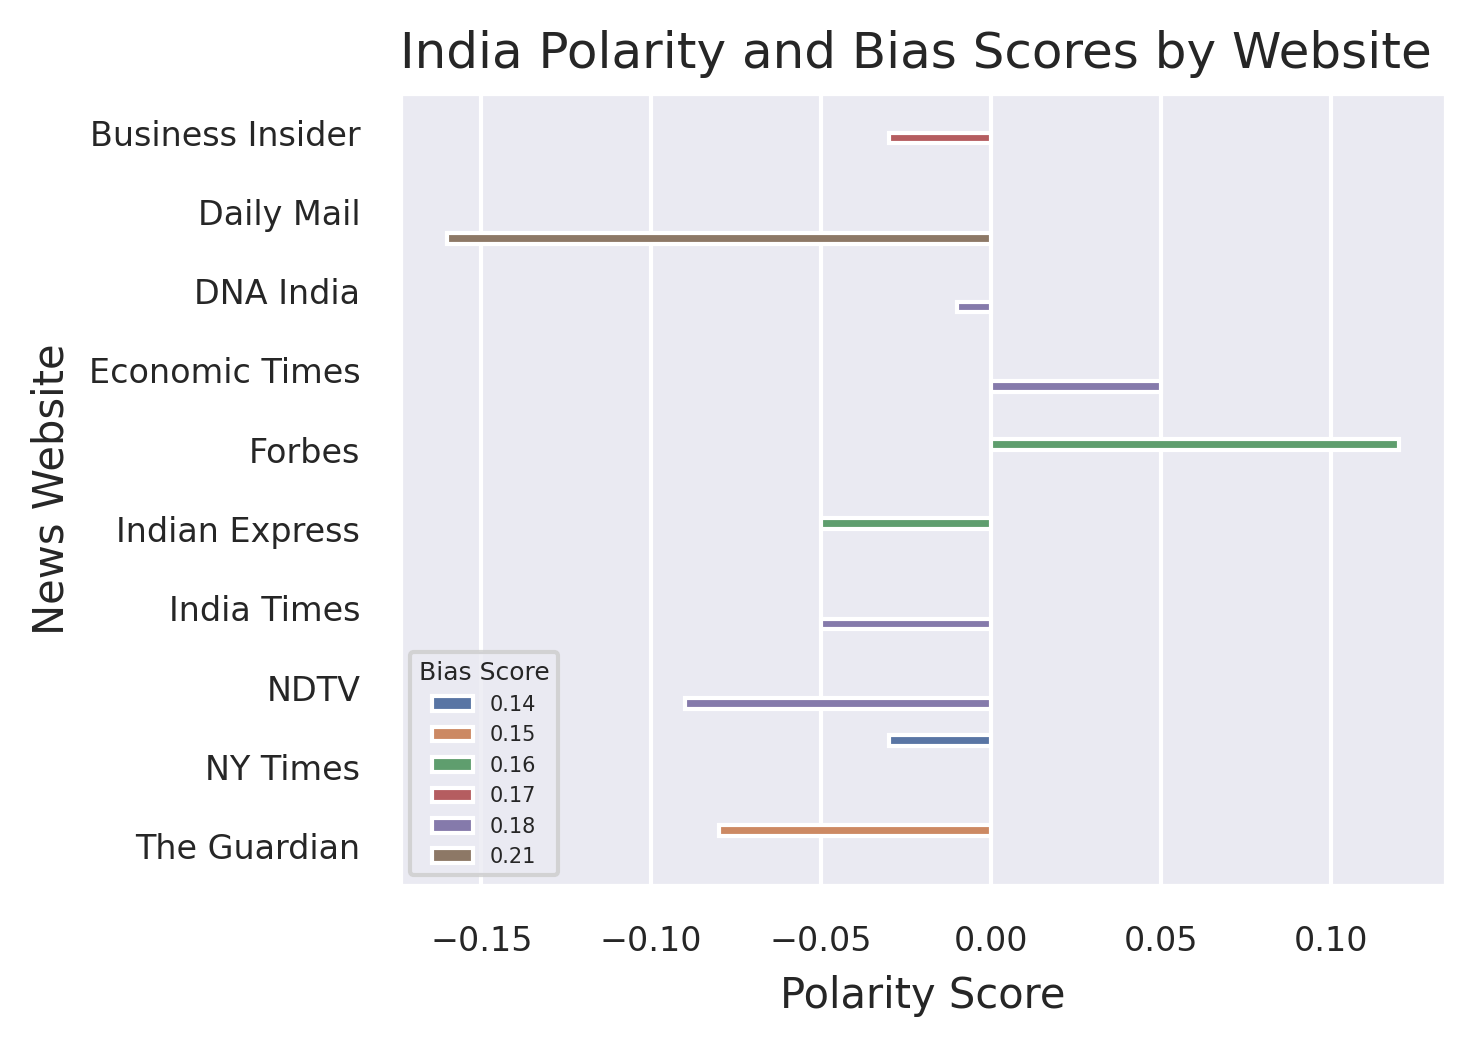

And here is the USA's: 
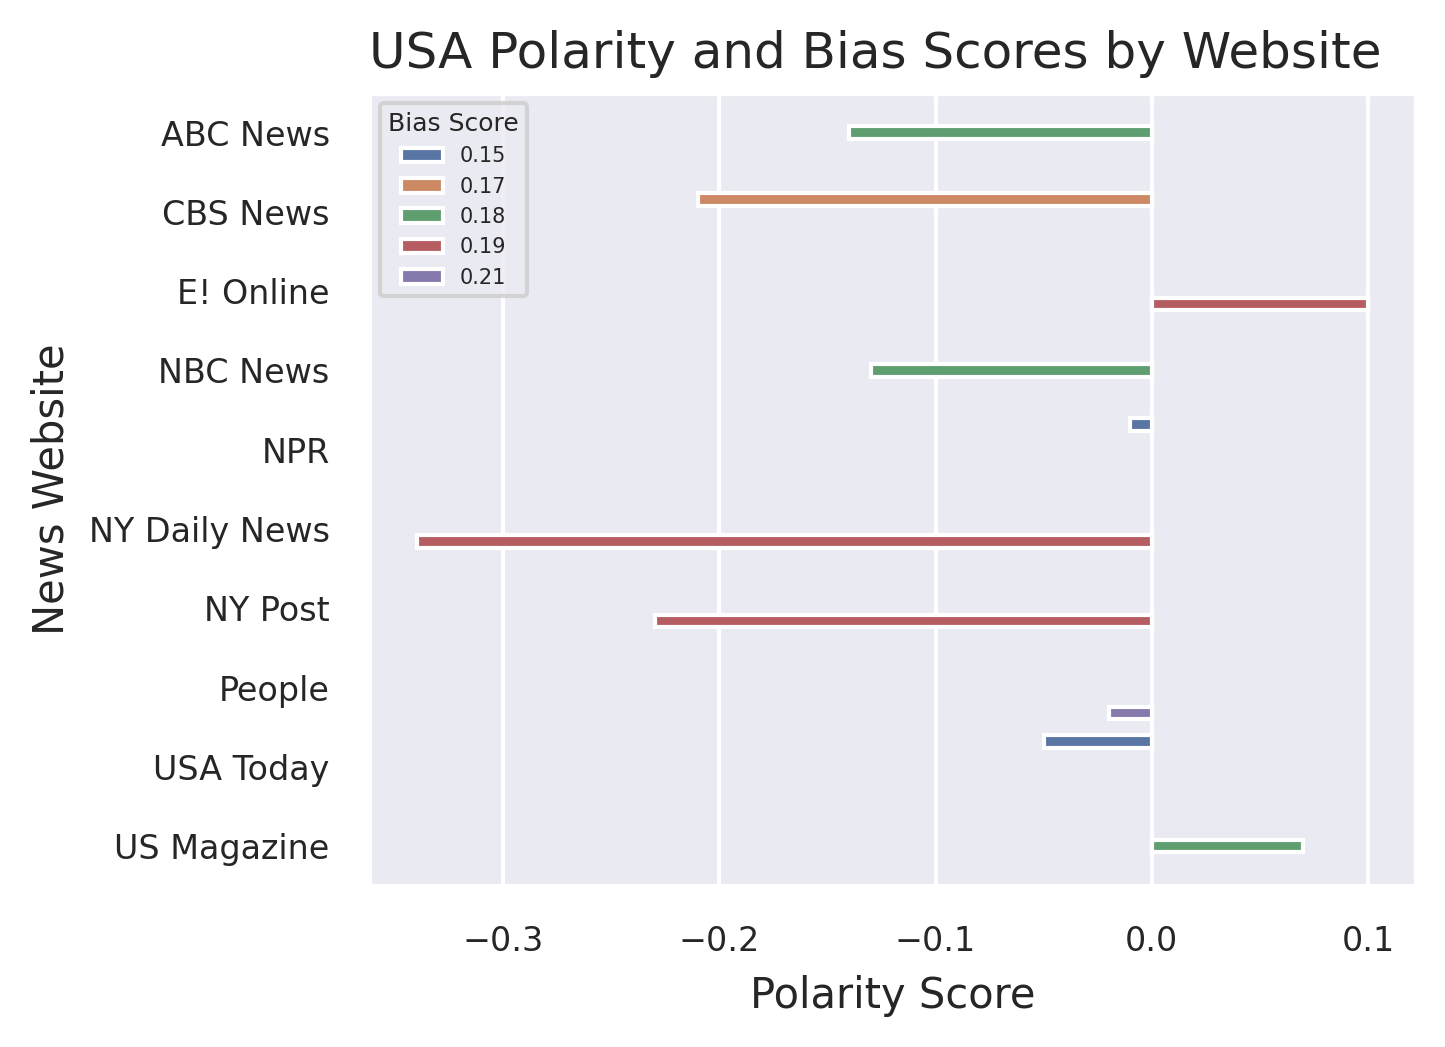

From this, we can gather that news in the USA is overall more generally negative, as the lower average polarity score is -.3, while the lowest average polarity score in India is -.15. India's maximum polarity score is .10, while the USA's is only .1, furthering this observation. The most positive news source in the USA in regards to women is E! Online, which is primarily celebrety news. With that, it makes sense, as most news sources report on many tragic events. Interestingly, Forbes is the most positive news source in India, followed by the Economic Times, likely because they are both mostly financial news. 

We decided to look at the relationship between Bias scores, Polarity scores, and time. Here is the USA polarity and bias, with time added as an index: 

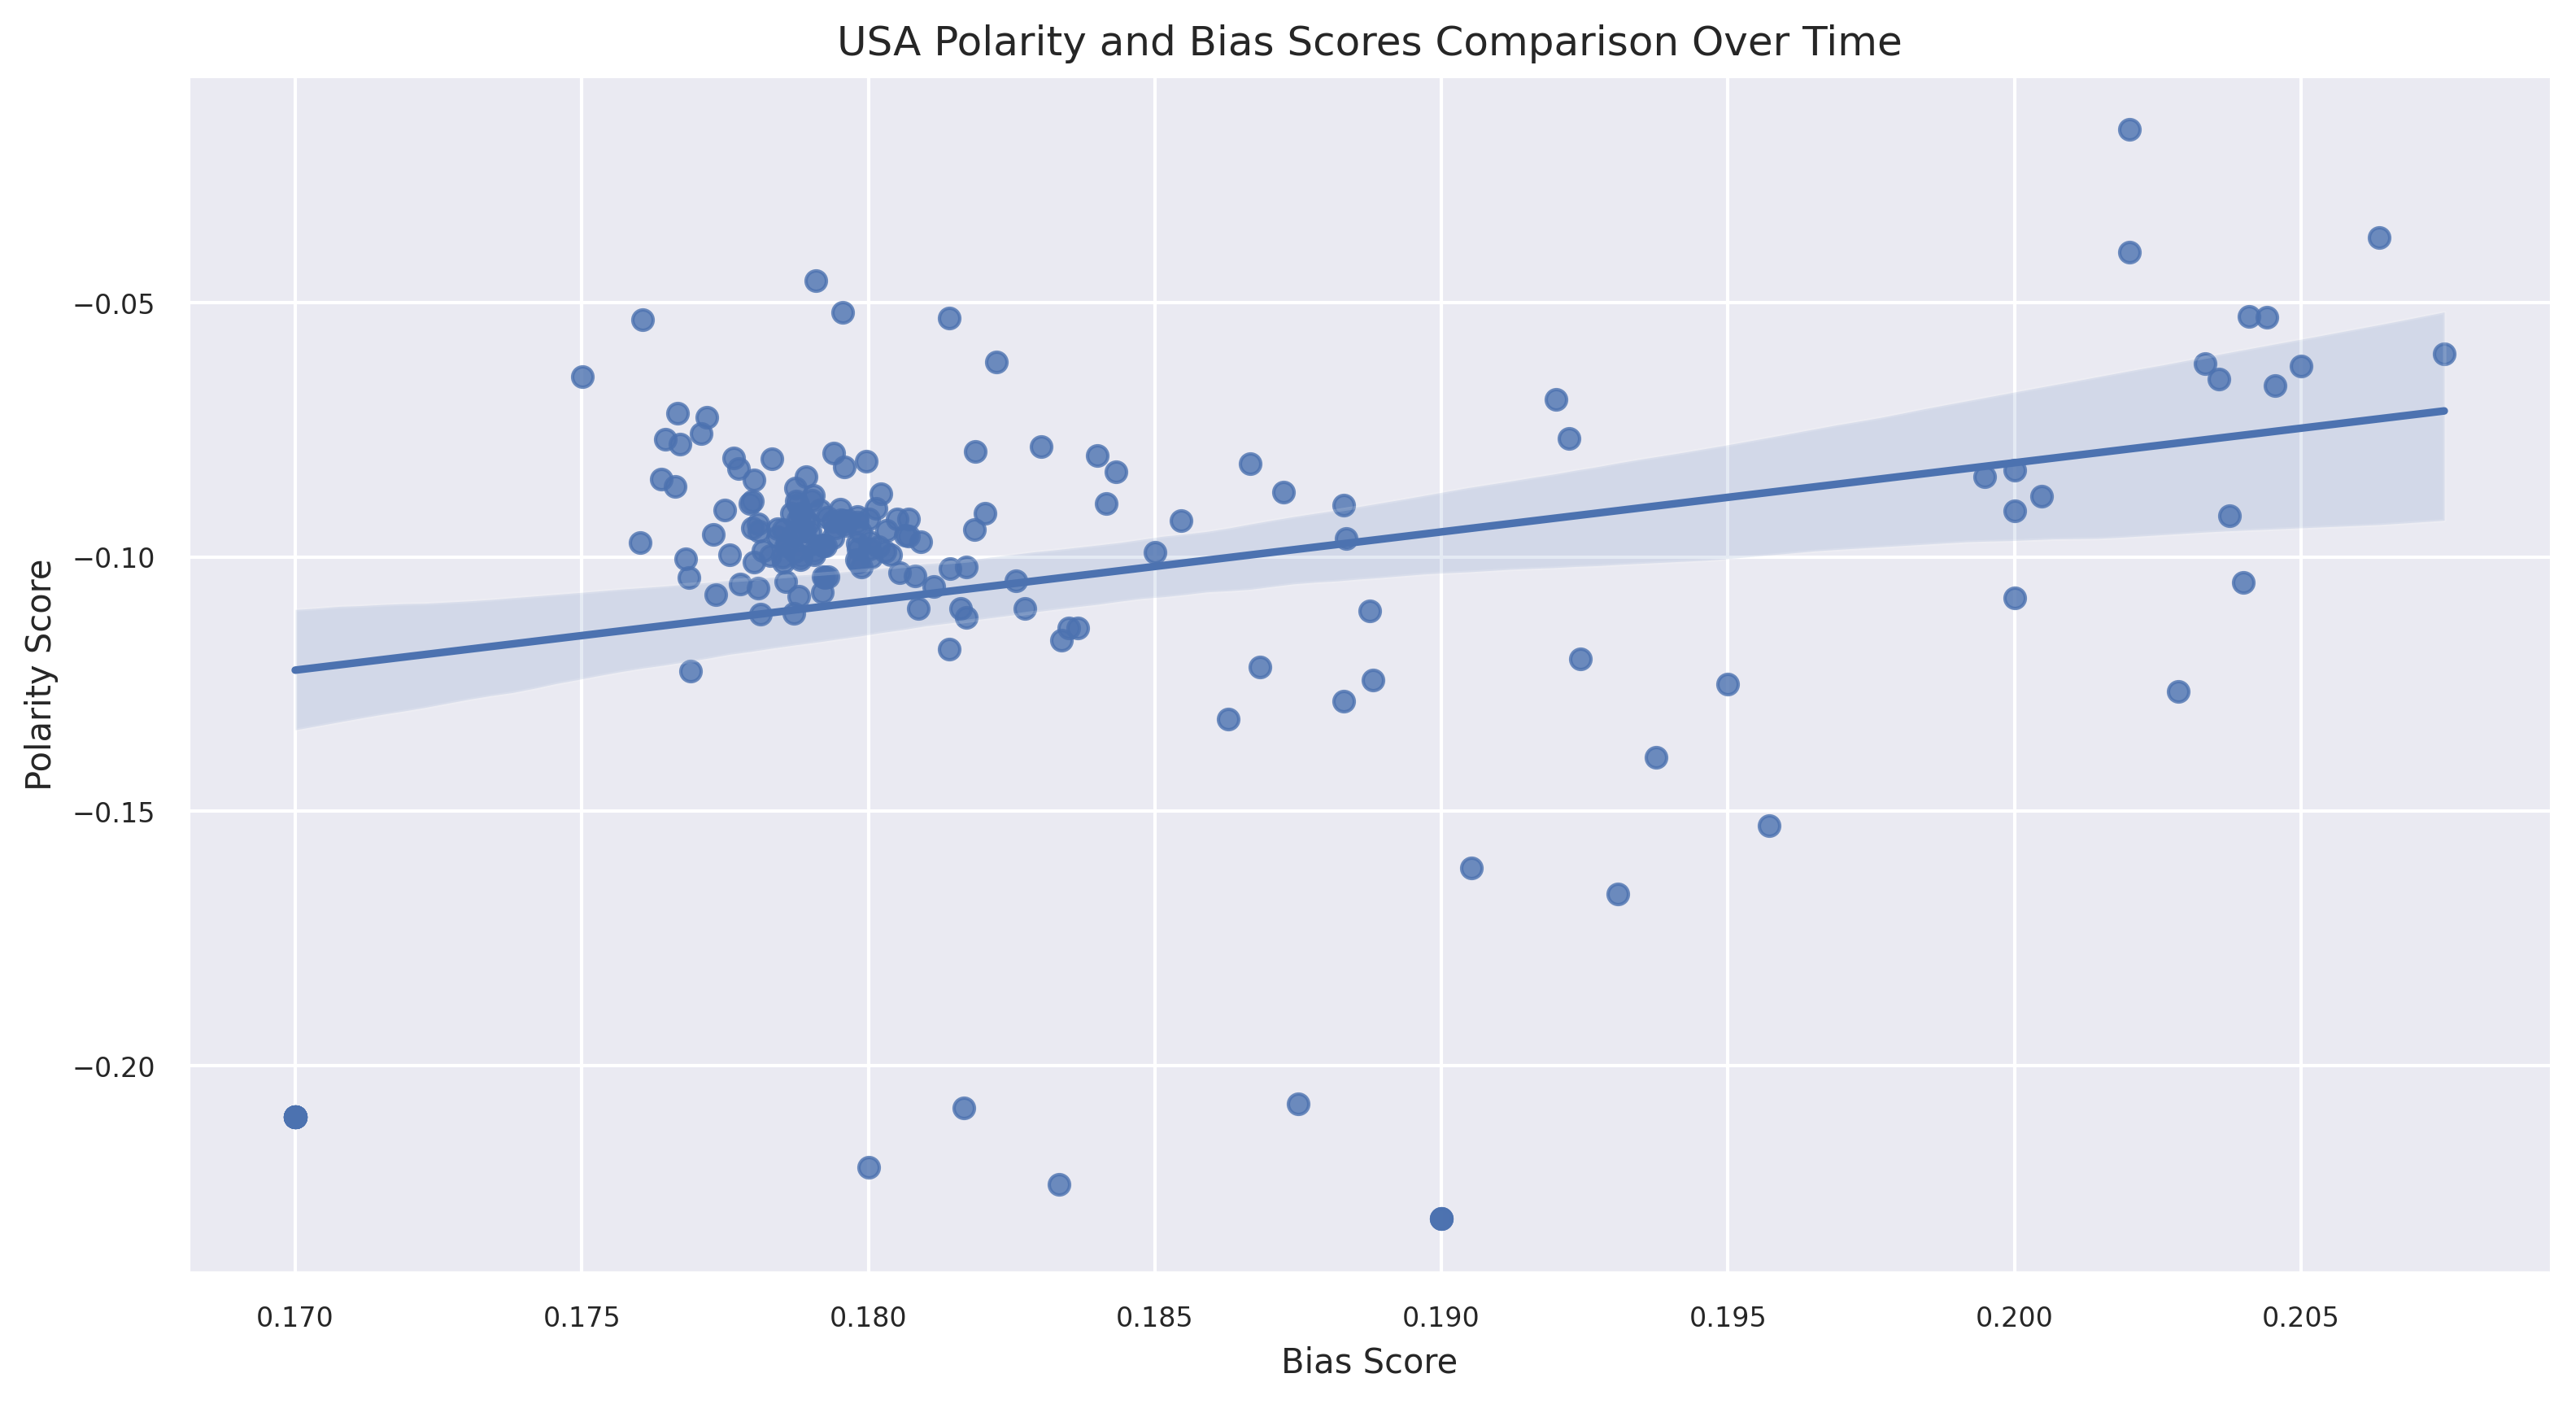

And here is the same with the headlines from India:

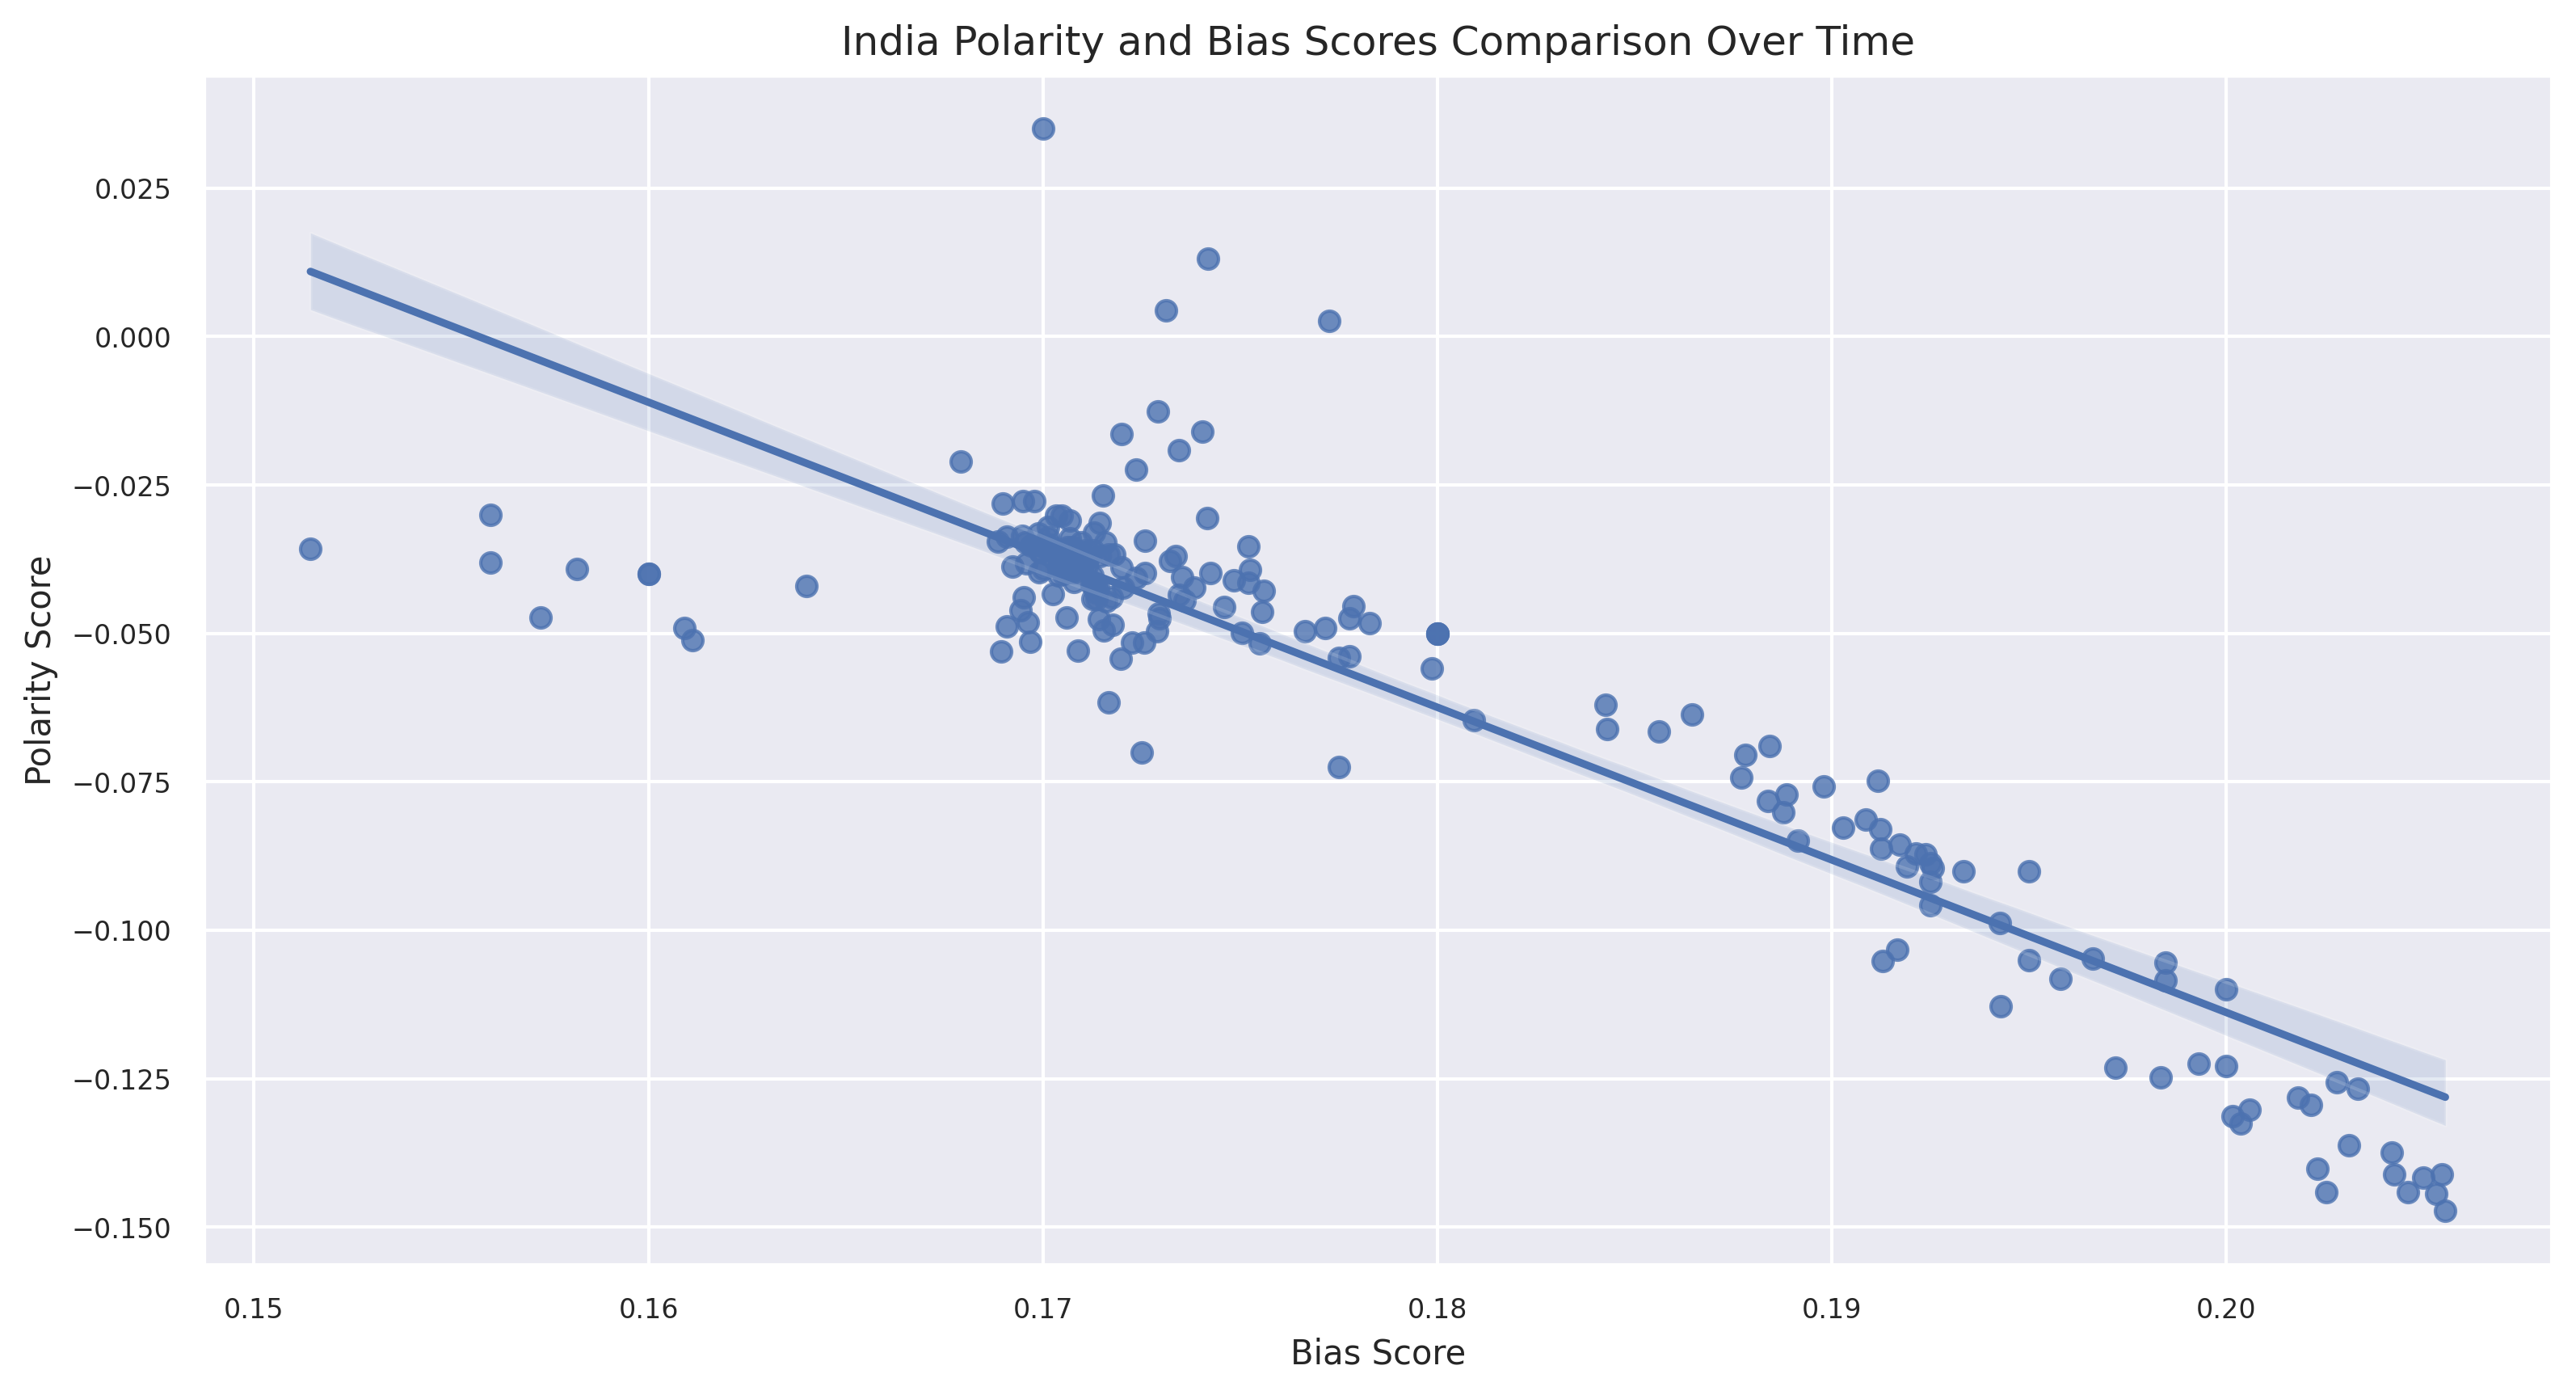

It looks like they are swapped. The USA's scores go up over time, while India's go down. This is an interesting relationship, sow we wanted to look at what changes may have occured to produce such a result. 

This datset includes about 15 years of data. We decided to divide these up into groups of 5 years and look at the Bias scores over periods of time. Here is the results of this from the USA data: 

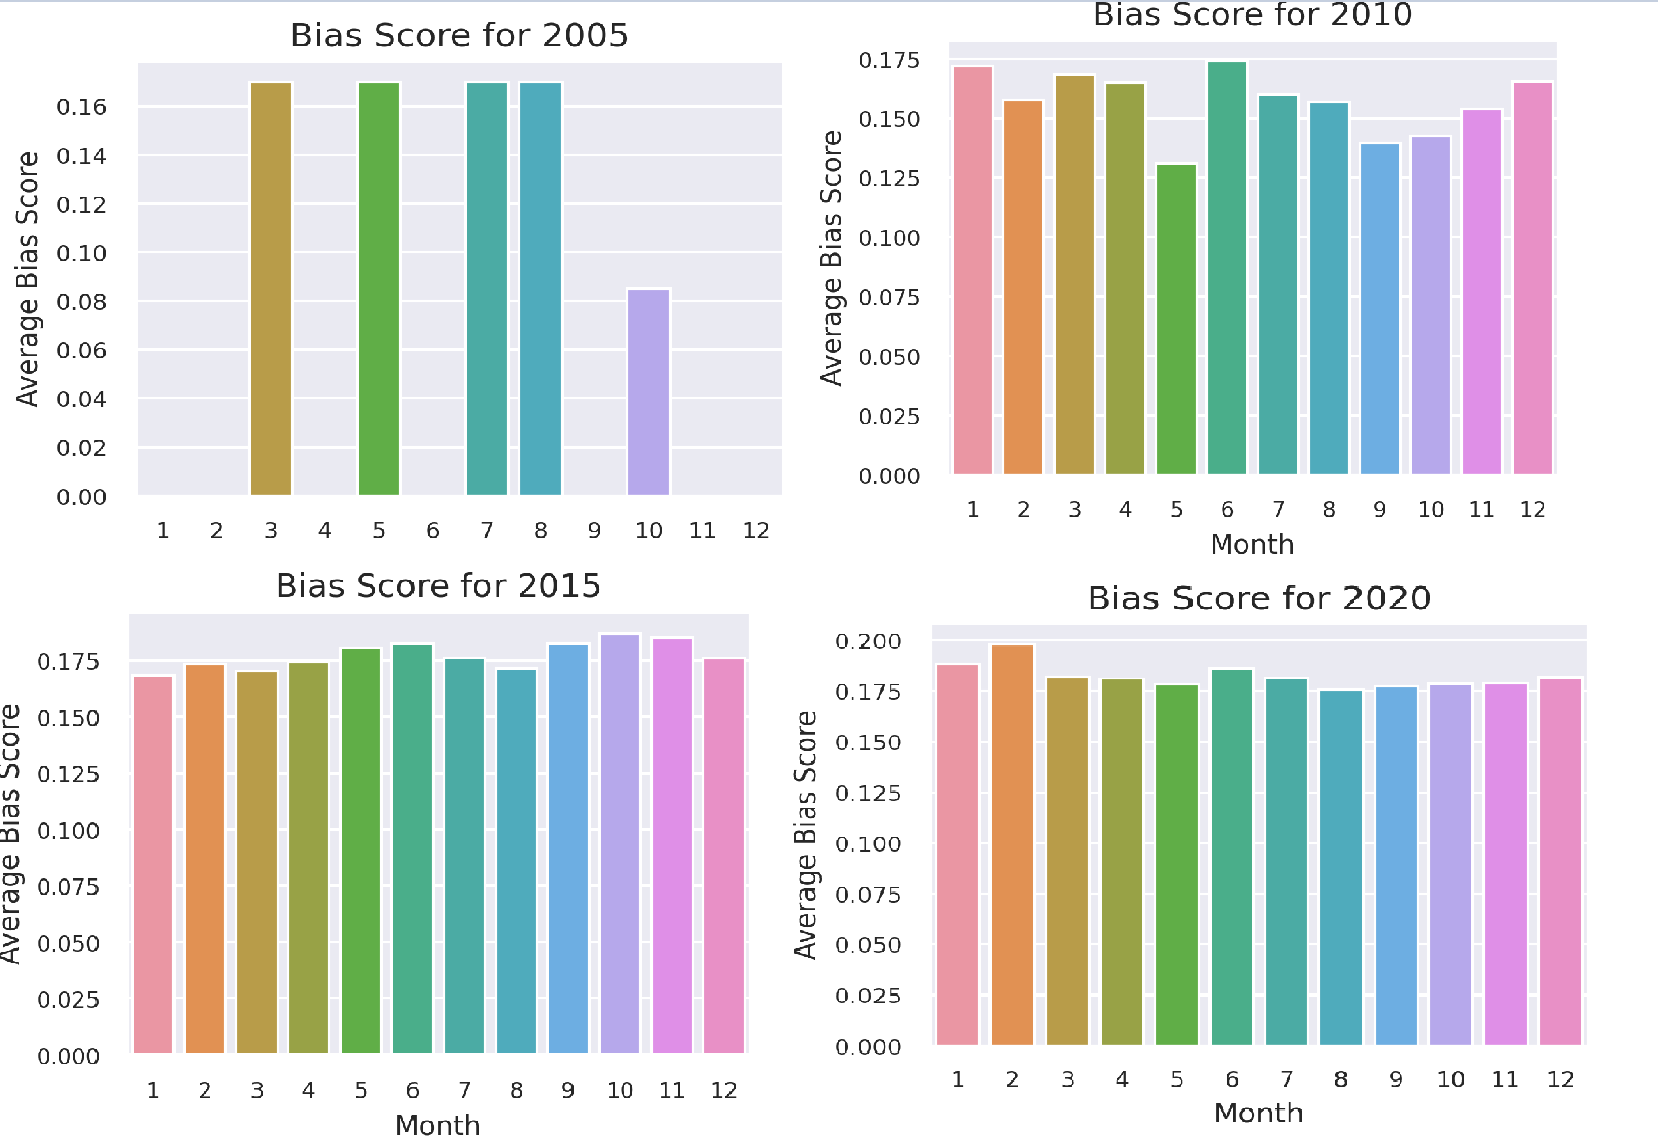

And here is the Bias scores over time for India: 

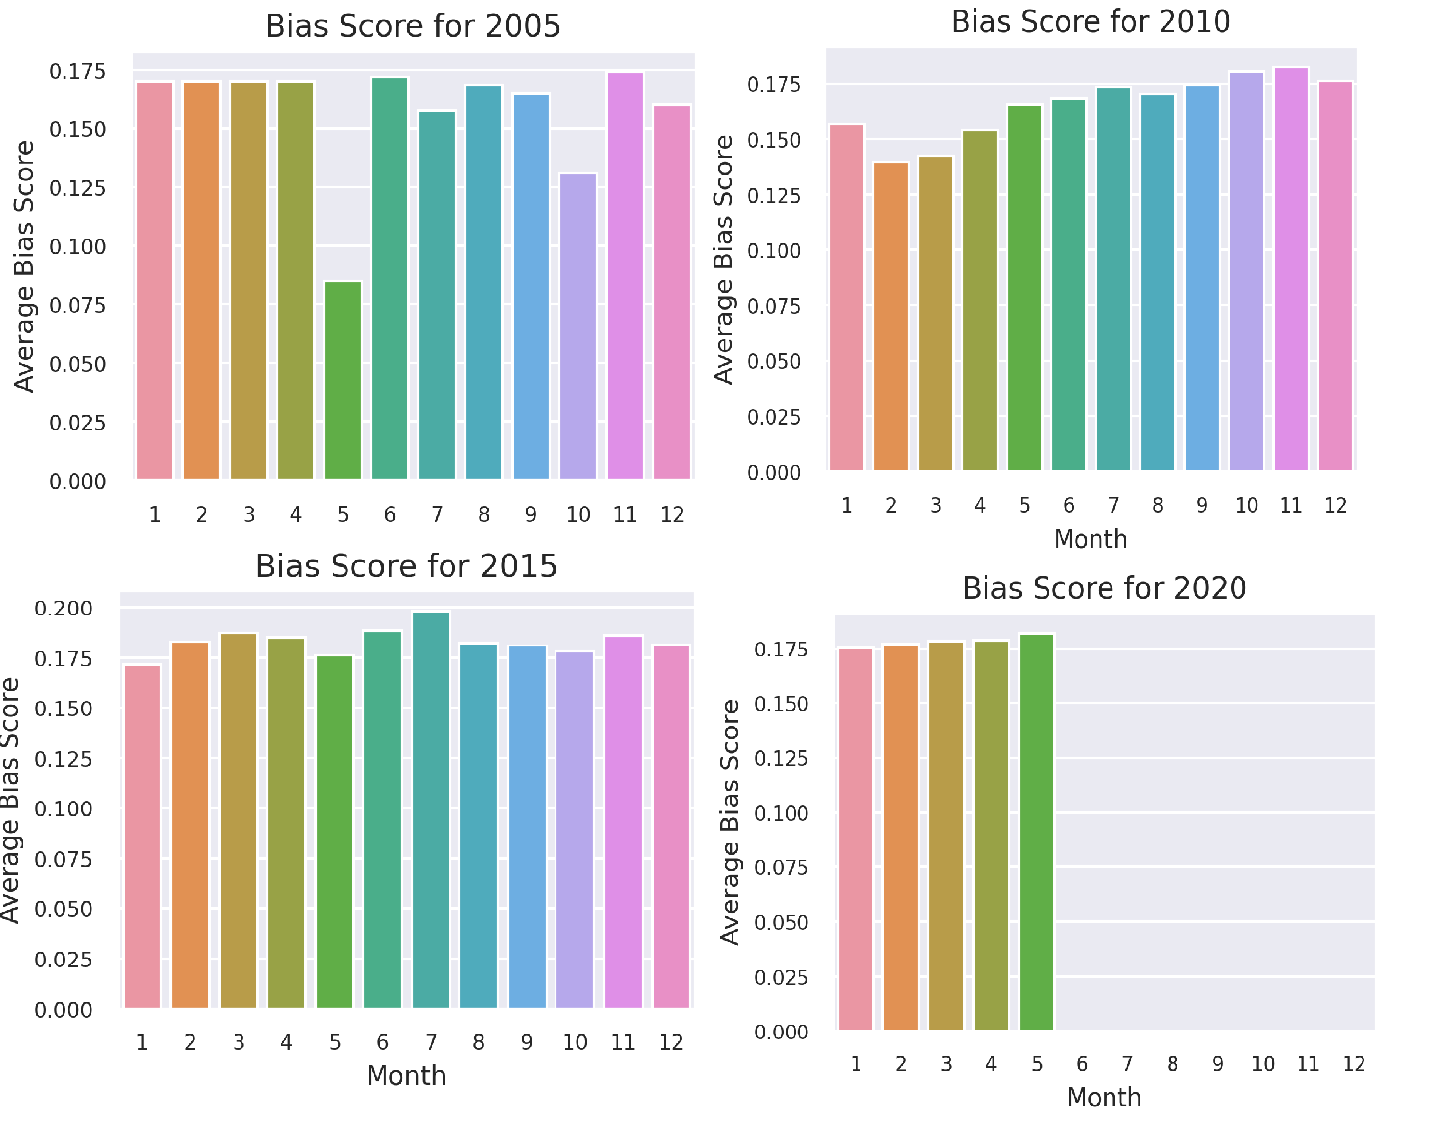

The trend here is interesting because in the 5 year period of time, India and USA almost have reverse Bias scores. In 2005 in the USA, almost half of the months in that year had an average Bias score of 0, which is indicating no bias or very trace amounts depending on the gendered language in the headline. In 2020 in India, this was also the same effect. All of the other year increments had fairly high Bias scores per month, around 0.175 for both India and US. In 2005 in May, India had a fairly low score compared to the rest. This may be due to the widespread coverage of the Delhi bomb blasts that occurred on May 13th, 2005 that killed more than 60 people and injured over 200.

# Part 2: Topic Modeling and Predictions

This process can be seen in the notebook: [Topic Modeling](https://colab.research.google.com/drive/1huSOsTTwBmZau3AjhxuePpDAExmZ9aaa?usp=sharing)

**Content Warning: These topics were formed from real news headlines**

For our prediction task, we decided to only use only the headlines that originated from the USA. Any other data gave us processing times of 20 minutes and onward. For this task, we decided to use the BERTopic python library to identify topics and predict new topics. This is an unsupervised machine learning task.
<br><br>
From the USA headlines, we tried using PCA to identify topics. This did not work, however, and ended up leaving out a large portion of our headlines in the process of reducing dimensionality. Because this didn't work the way we planned, we pivoted into using the UMAP model with KMeans clustering to be able to identify more topics. 
<br><br>
The UMAP model and Kmeans clustering worked much better. We were able to set the parameters so that there would be 50 topics in the result and it would include all the headlines we were looking for. Some of the extracted topics from headlines can be seen below: 

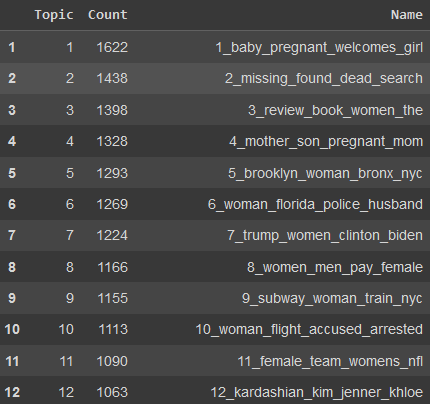

After running this model, we were able to see a much wider range of topics. Since the names were very long and difficult to process, we decided to dwindle down the topic names to only include the two most important words in the topic. You can see some of the shortened topics here: 

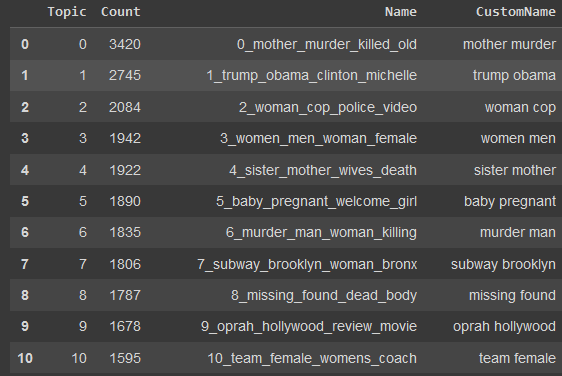

Now let's apply these topics to our headlines and see some of the results. The numbers correlate to a topic as seen above: 

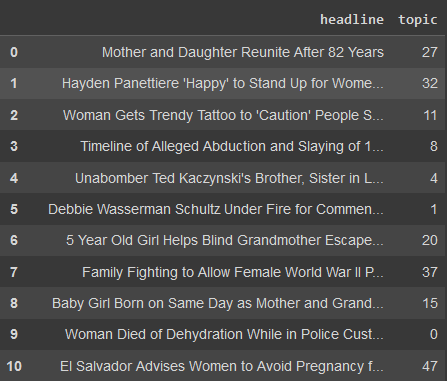

After this, we were able to use some of the built in visualization tools in BERTopic to do exploration. The following visualization is a 2D representation of the topics within the headlines. We took a smaple of 10% of the headlines for each category and then mapped them on the headlines as a 2D plane. The colors relate to the different topics, while the density shows where topics happen to overlap. 

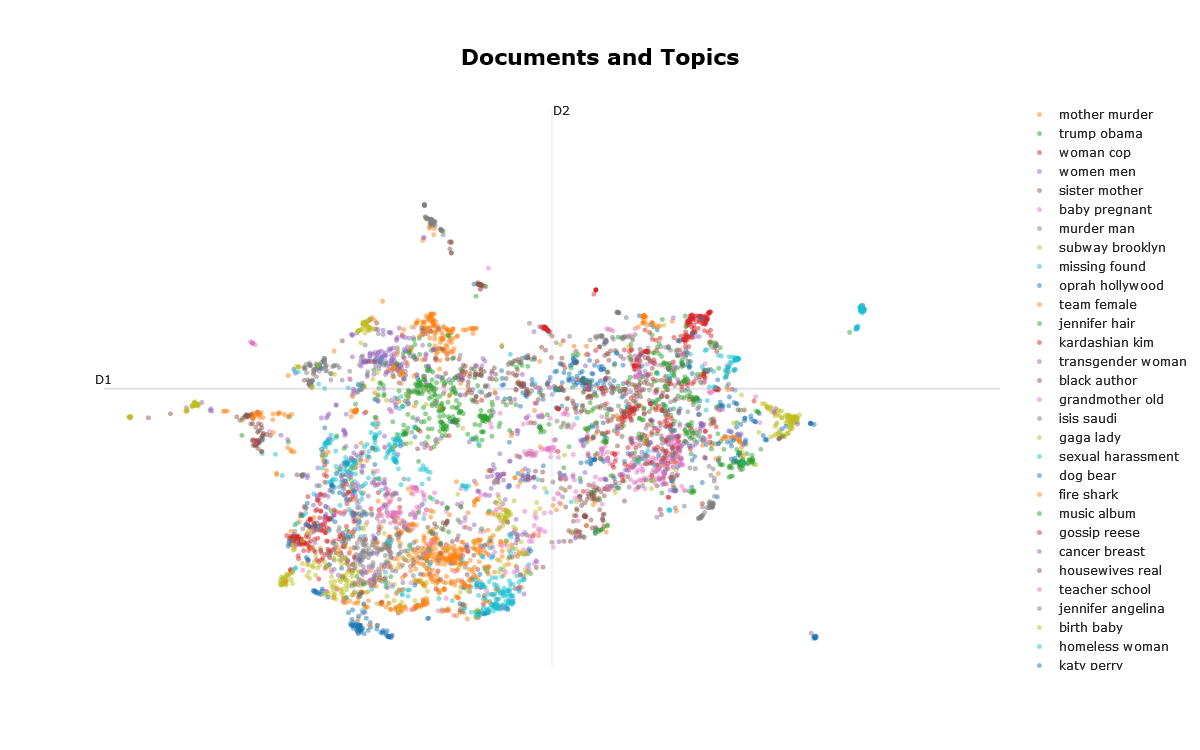

Looking through it, many headlines are grouped in the way that you might think. Headlines about celebrities are clustered together, as are headlines about COVID, and those about sports. This shows that our model is working in the ways that we would expect it to. 

Each topic is represented by words that are assigned by the BERTopic algorithm. While they belong to a topic, they may not fully represent it. The chart below shows the top 20 topics broken down by their c-TF-IDF scores which show each word's importance for an overall topic. 

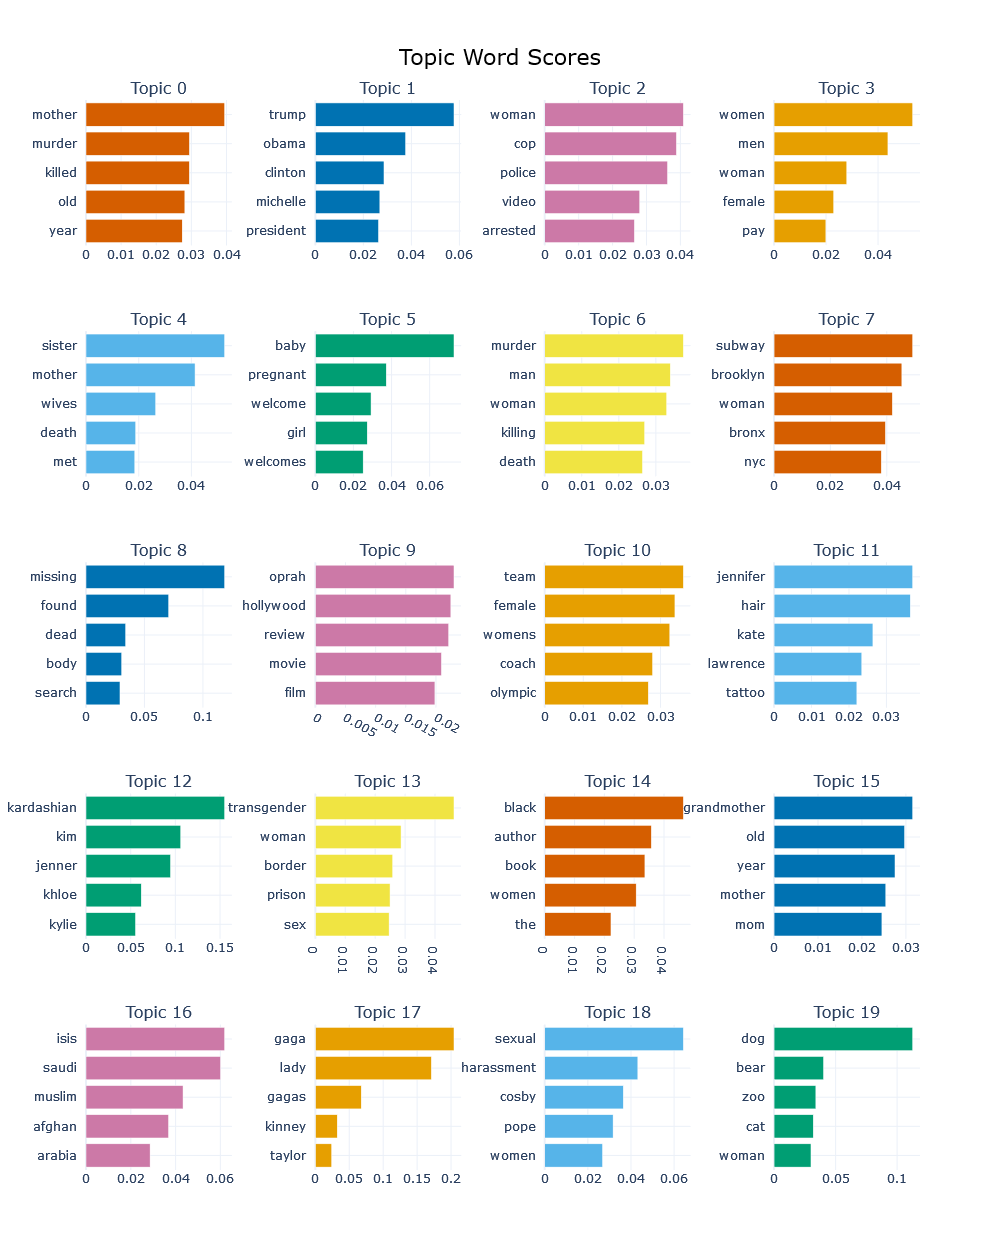

We used other tools to look at relationships between topics. Below shows a similarity matrix that is produced within the model to classify topics. These scores range from 0-1, with 1 being the highest similarity betweeen two topics. 

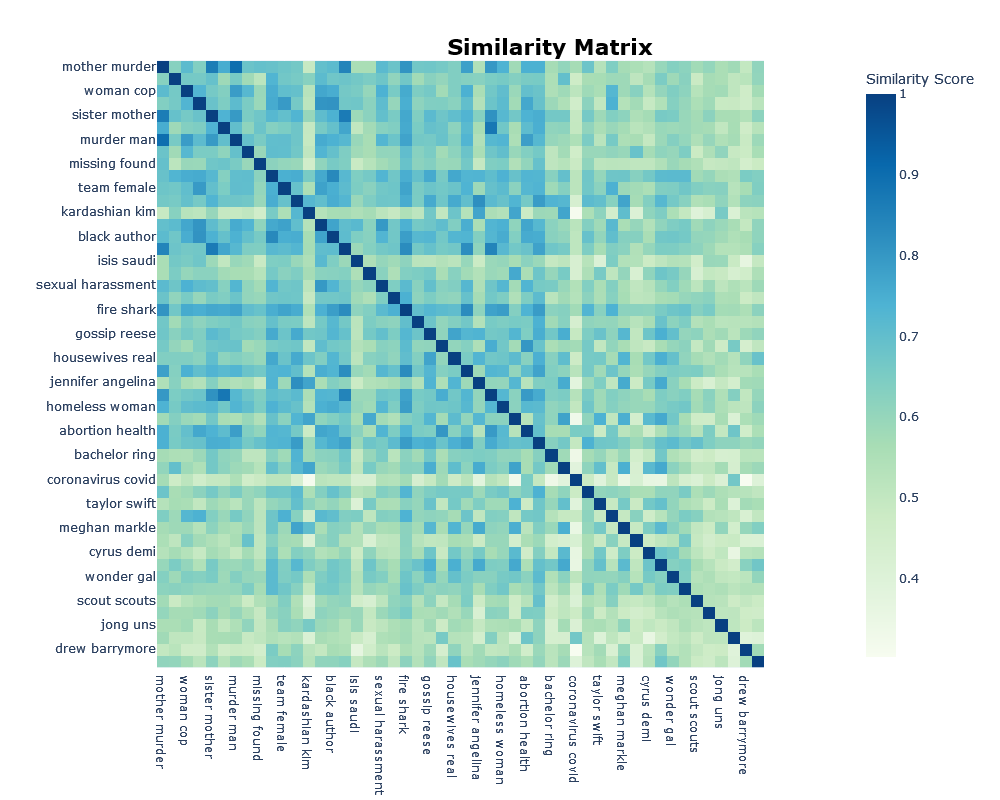

Similarly to the similarity matrix, we can see a hierarchial clustering of the topics and their relationships to each other. This is from a function in BERTopic that returns this information and can visualize it. It can be seen below: 

After viewing these, we decided that we wanted to see the frequency of the topics over time, much like we looked at the bias and polarity scores over time in Part 1. A topics over time visualization can be seen below: 

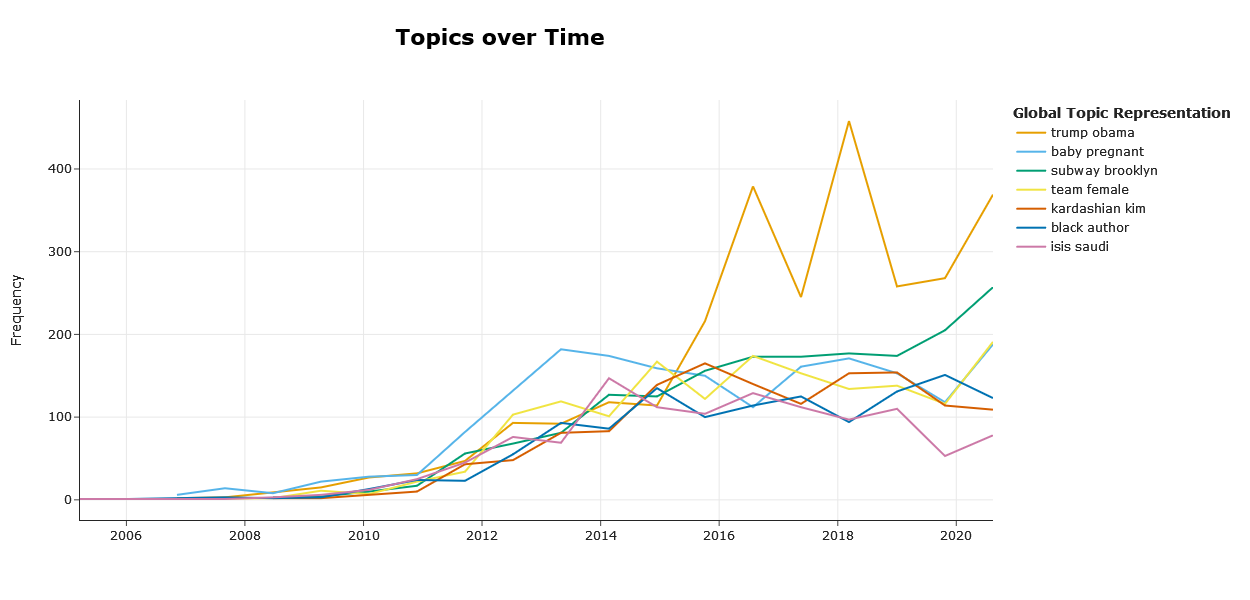

We decided after this that we wanted to see if there was a correlation between topics and polarity scores, but that exploration did not come up with any interesting relationships. Instead, we decided to see if we could find anything in the relationship between average polarity scores and the topics for each news source. To do so, we had to make a new dataframe, which can be seen here:

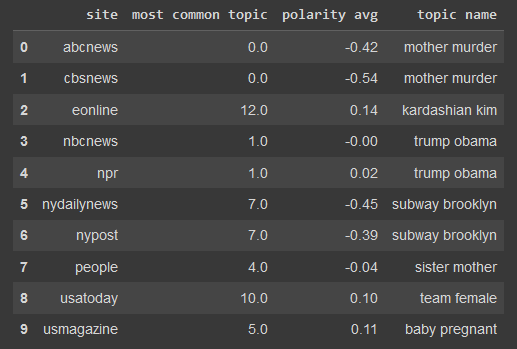

Much like we saw in the graphs in Part 1, many news sources had very negative average polarity scores. To make it easier to gather information about this, we created a visualization that compared the polariry score by topic with the sites as a value: 

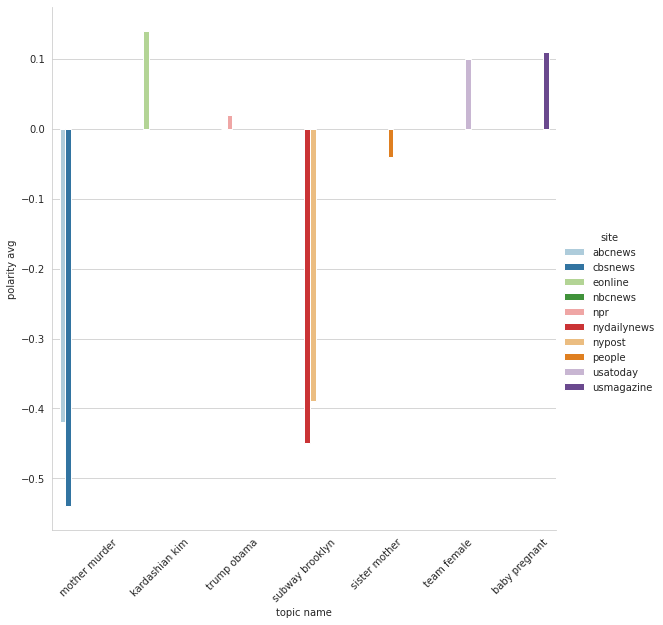

We were expecting to potentially see variance in the polarity scores per topic and news site, but it appears that they are quite similiar. The news sites that were shown to have a higher polarity score in Part 1 are the ones with a much more lighthearted topic, while the more negatuve polarity scores are from sites that cover darker topics. 
<be><br>
To get a larger picture of the full topics, we printed out the word scores again for each of the topics that were used in the graph above. They are here:  

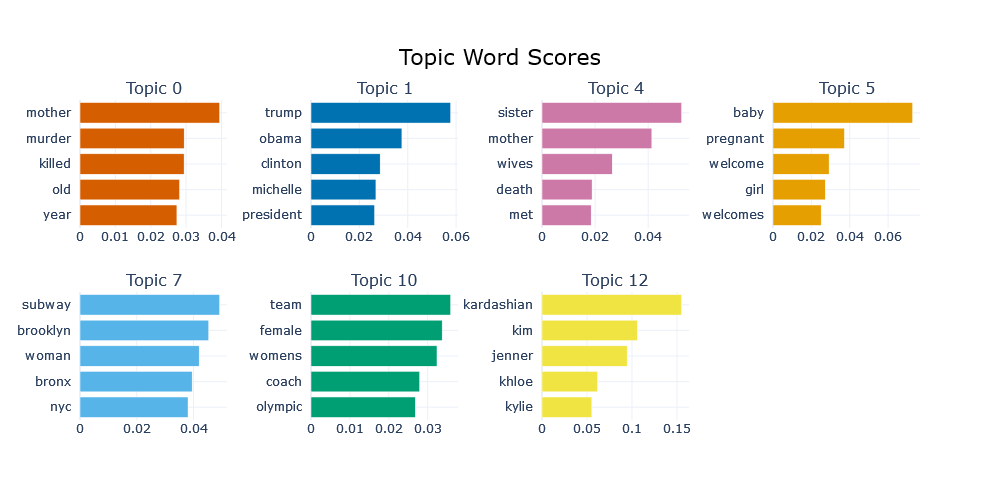

It's interesting how prevalent news from New York City is overall. Of similar importance is ranked: the Kardashians, the Olympics, and USA poltics.

We then looked at how prevalent these topics were over time: 

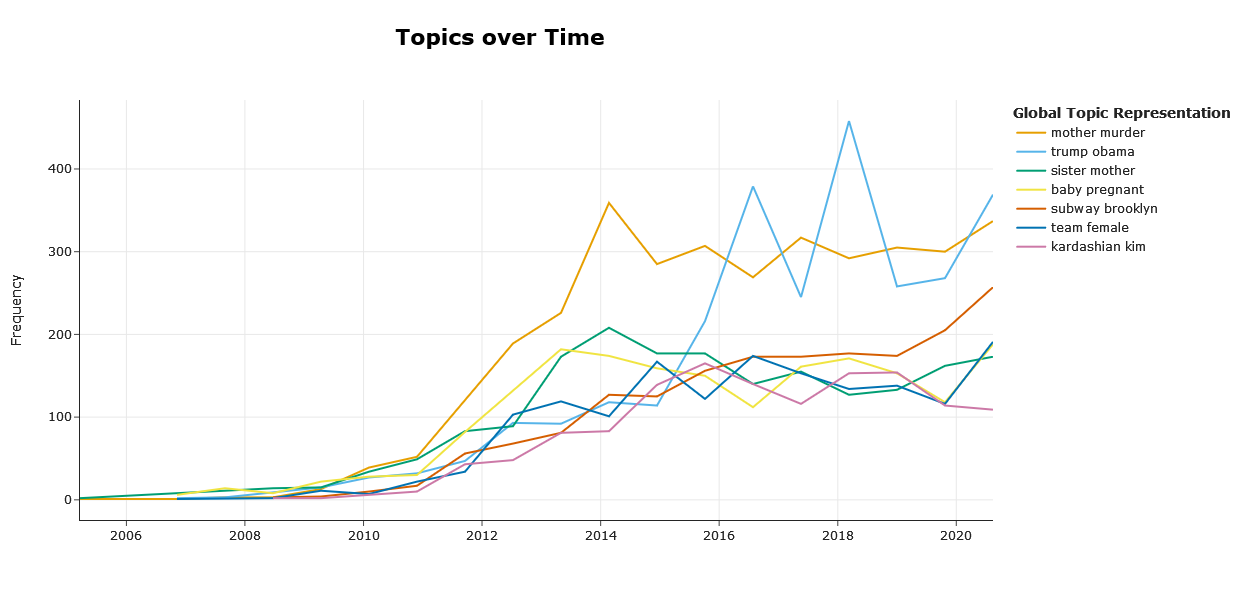

The blue line indicating politcs has a predictable spike around the 2016 election, while the orange line about murders has an interesting spike around 2014. We couldn't find any large events that could have attributed to this, so we aren't entirely sure what caused that. News about New York City also began to spike around 2020, possibly due to COVID, but it is uncertain if that is the entire cause. 

With all of these visualizations, we felt confident in the performance of our model and the results that we got. Analyzing these was really interesting and lead to more insights than we thought we could get.

# Conclusion

Through using unsupervised learning to uncover hidden structure, we found that lot of headlines that involve women were astoundingly negative, except in the case of celebrity news or financial news. There was an incredibly obvious split between these two categories of sources. This makes sense, considering that most news sites cover tragedies unless they are about niche news and events. 
<br><br>
It was surprisng how different the scores over time were for both the USA and India and how they ended up swapped over time. One explanation is that it could show different viewpoints on the current state of the world by both countries.
<br><br>
Overall, we were satisfied by the results that were produced by this model and glad that our final project worked as we intended it to.
<br><br>
Thank you for reading!